## Ultimate Challenge Project

This project aims at identifying key features of driver management in the cities of Gotham and Metropolis. The project has three specific goals -
1. Part 1: Exploratory Data Analysis
2. Part 2: Experiment and Metrics Design
3. Part 3: Predictive Modeling
The following sections expand the project to achieve these goals. 

## Part 1 : Exploratory Data Analysis

In [ ]:
# Import required pacakges
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [55]:
# Load json data file
data = 'logins.json'
f = open(data)
logins = json.loads(f.read())
f.close()

In [56]:
#create dataframe
df = pd.DataFrame(pd.to_datetime(logins['login_time']), columns = ['login_time'])
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [57]:
#Checking if any missing values are present
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending= False)

,count,%
login_time,0,0.0


In [58]:
#colum for resample
df['count'] = 1
#indexing and dropping redundant column
df.index = df['login_time']
df.drop('login_time',axis=1,inplace=True)
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


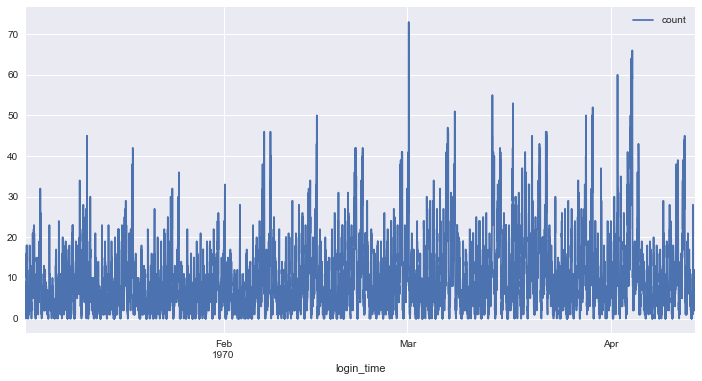

In [59]:
#Plotting the 15 minute intervals over the 4 month period, 
df_count = df.resample('15min').sum()
df_count.plot(kind='line',figsize=(12,6))

In [60]:
#new columns for weekday and month
df_count = df_count.assign(month_day=df_count.index.day)
df_count = df_count.assign(weekday=df_count.index.weekday)
df_count.head()

,count,month_day,weekday
login_time,,,
1970-01-01 20:00:00,2,1,3
1970-01-01 20:15:00,6,1,3
1970-01-01 20:30:00,9,1,3
1970-01-01 20:45:00,7,1,3
1970-01-01 21:00:00,1,1,3


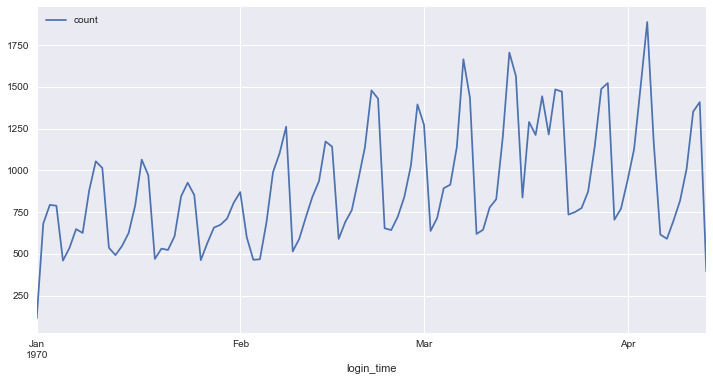

In [61]:
#daily frequency
df_day = df.resample('1D').sum()
df_day.plot(kind='line',figsize=(12,6))

Text(0.5, 1.0, 'January')

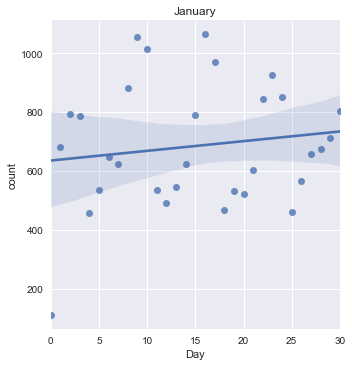

In [64]:
#plot January trend
plot_df = df_day[df_day.index.month==1]
plot_df = plot_df.assign(x = range(plot_df.shape[0]))
sns.lmplot(data=plot_df,x='x',y='count')
plt.xlabel('Day')
plt.title('January')

Text(0.5, 1.0, 'February')

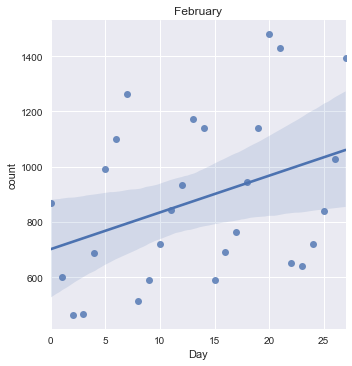

In [65]:
#plot February trend
plot_df = df_day[df_day.index.month==2]
plot_df = plot_df.assign(x = range(plot_df.shape[0]))
sns.lmplot(data=plot_df,x='x',y='count')
plt.xlabel('Day')
plt.title('February')

Text(0.5, 1.0, 'March')

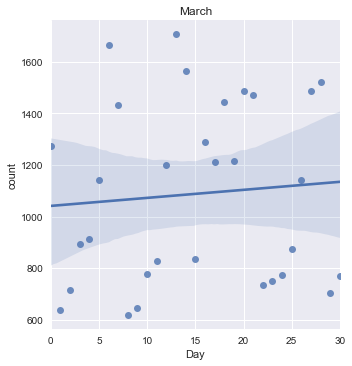

In [66]:
#plot March trend
plot_df = df_day[df_day.index.month==3]
plot_df = plot_df.assign(x = range(plot_df.shape[0]))
sns.lmplot(data=plot_df,x='x',y='count')
plt.xlabel('Day')
plt.title('March')

Text(0.5, 1.0, 'April')

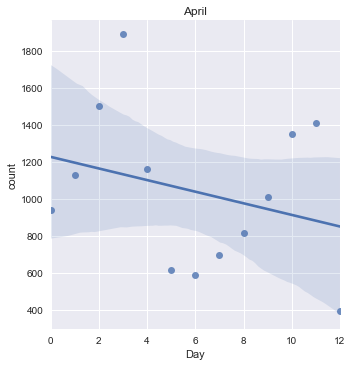

In [67]:
#plot April trend
plot_df = df_day[df_day.index.month==4]
plot_df = plot_df.assign(x = range(plot_df.shape[0]))
sns.lmplot(data=plot_df,x='x',y='count')
plt.xlabel('Day')
plt.title('April')

The monthly trend shows that there is an upward trend in January, February, and March. However, April has a downward trend.

## Experiment and Metrics Design

Use Random Forest Model and Logistic Regression Models to indentify relative importance of features. 

## Predictive Modeling

In [88]:
#import data from json file
file = 'ultimate_data_challenge.json'
with open(file) as f:
    data = json.loads(f.read())
df = pd.DataFrame(data)

In [89]:
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [91]:
#Checking if any missing values are present
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending= False)

,count,%
avg_rating_of_driver,8122,16.244
phone,396,0.792
avg_rating_by_driver,201,0.402
city,0,0.000
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000


Average rating of and by drivers, and phone data have missing values.

In [92]:
#drop rows with no phone information
df = df.drop(df[df.phone.isna()==True].index,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    41578 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [93]:
#Further explore average rating by driver variable
df['avg_rating_by_driver'].describe()

count    49406.000000
mean         4.777861
std          0.447114
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [98]:
df['avg_rating_of_driver'].describe()

count    49604.00000
mean         4.64977
std          0.57582
min          1.00000
25%          4.50000
50%          4.90000
75%          5.00000
max          5.00000
Name: avg_rating_of_driver, dtype: float64

In [99]:
#fill missing values with mean value
mean_by_rating = 4.77
mean_of_rating = 4.64
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value=mean_of_rating)
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value=mean_by_rating)

In [100]:
#Checking if any missing values are present
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending= False)

,count,%
city,0,0.0
trips_in_first_30_days,0,0.0
signup_date,0,0.0
avg_rating_of_driver,0,0.0
avg_surge,0,0.0
last_trip_date,0,0.0
phone,0,0.0
surge_pct,0,0.0
ultimate_black_user,0,0.0
weekday_pct,0,0.0


In [101]:
#convert to timestamp
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [102]:
#set current date 
current_date = df['last_trip_date'].max()

In [103]:
# active user qualification
df['active'] = df['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [104]:
#Dummy variables for categorical features
df_features = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])
df_features.head()
#set target and drop unuseful columns
target = df_features['active']
df_features = df_features.drop(['last_trip_date','signup_date','active'],axis=1)

### Build Predictive Model

In [105]:
df.active.value_counts(normalize=True)*100

0    62.35989
1    37.64011
Name: active, dtype: float64

In [106]:
#Import required predictive modeling packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [107]:
#data scaling
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

In [109]:
#training and test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2,random_state=42)

In [110]:
#random forest model with 1000 estimators
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [48]:
rf.score(X_test,y_test)

0.7494204213284951

In [49]:
print(cross_val_score(rf,X_test,np.ravel(y_test),cv=5))
print('Mean Cross Validated Score:',np.mean(cross_val_score(rf,X_test,np.ravel(y_test),cv=5)))

[0.75415617 0.74596774 0.75252016 0.74546371 0.74798387]
Mean Cross Validated Score: 0.7493189851304136


In [50]:
df_importance = pd.DataFrame(zip(list(df_features.columns),rf.feature_importances_),index=range(df_features.columns.shape[0]),columns=['feature','importance'])
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
5,avg_dist,0.300909
4,weekday_pct,0.133044
6,avg_rating_by_driver,0.112284
0,trips_in_first_30_days,0.081047
1,avg_rating_of_driver,0.080704
3,surge_pct,0.076747
2,avg_surge,0.068941
8,city_King's Landing,0.047121
11,phone_iPhone,0.019945
10,phone_Android,0.019638


Average distance driven, weekday percentage, and the rating given to the passenger by the driver are important features than other features.

In [51]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[4952, 1248],
       [1238, 2483]])

In [52]:
#weighted metrics
precision_recall_fscore_support(y_test,y_pred,average='weighted')

(0.749555987071383, 0.7494204213284951, 0.7494874287045953, None)

The model has average 75% accuracy.

Logistic Regression Model

In [53]:
#initialize model
logit = LogisticRegression(solver='lbfgs')
#set parameter grid
param_grid = {'C':np.arange(0.5,5.1,0.1)}
#instantiate and fit grid search object
grid = GridSearchCV(logit,param_grid,cv=5)
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [54]:
print(np.mean(cross_val_score(grid,X_test,np.ravel(y_test),cv=5)))

0.7424654160234013


Logistic regression model gives 74% accuracy. Both random forest and logistic regression models perform the same. 